### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# masuk folder "FinalProjectH8"
% cd /content/gdrive/MyDrive/FinalProjectH8

/content/gdrive/MyDrive/FinalProjectH8


In [ ]:
! ls


data  Dataset_image.csv  GuideGet  mobile.csv  mobile.gsheet  model_ft


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('data'):
  print(f"Ada {len(dirnames)} folder dan ada {len(filenames)} file di dalam {dirpath}")

Ada 2 folder dan ada 0 file di dalam data
Ada 4 folder dan ada 0 file di dalam data/train
Ada 0 folder dan ada 1956 file di dalam data/train/Iphone 11
Ada 0 folder dan ada 1231 file di dalam data/train/Iphone XS
Ada 0 folder dan ada 398 file di dalam data/train/Iphone XR
Ada 0 folder dan ada 249 file di dalam data/train/Samsung Galaxy S10 Plus
Ada 4 folder dan ada 0 file di dalam data/test
Ada 0 folder dan ada 63 file di dalam data/test/Samsung Galaxy S10 Plus
Ada 0 folder dan ada 490 file di dalam data/test/Iphone 11
Ada 0 folder dan ada 308 file di dalam data/test/Iphone XS
Ada 0 folder dan ada 100 file di dalam data/test/Iphone XR


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('data/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Iphone 11' 'Iphone XR' 'Iphone XS' 'Samsung Galaxy S10 Plus']


In [ ]:
# view image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape : {img.shape}")
  return img

Image Shape : (107, 142, 3)


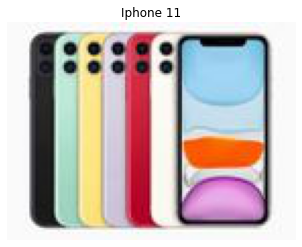

In [ ]:
img = view_random_image(target_dir = 'data/train/',
                        target_class = 'Iphone 11')

### Image Data Generator

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load data

tf.random.set_seed(46)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1 / 255.0)
valid_datagen = ImageDataGenerator(rescale=1 / 255.0)

# augmented object
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_dir = 'data/train'
val_dir = 'data/test'

# gunakan object datagen
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46) # bisa 16,32,64 tergantung performa ram device

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46,
                                               shuffle=False)


Found 3834 images belonging to 4 classes.
Found 3834 images belonging to 4 classes.
Found 961 images belonging to 4 classes.


In [ ]:
# buat model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(2))

model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D(2))

# flattened
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# train model
learn = model.fit(train_data_augmented,
                  epochs=30,
                  validation_data=valid_data)

Epoch 1/30
240/240 [==============================] - 842s 3s/step - loss: 1.1297 - accuracy: 0.5003 - val_loss: 1.0720 - val_accuracy: 0.5099
Epoch 2/30
240/240 [==============================] - 43s 181ms/step - loss: 1.0660 - accuracy: 0.5175 - val_loss: 1.0767 - val_accuracy: 0.5255
Epoch 3/30
240/240 [==============================] - 43s 181ms/step - loss: 1.0483 - accuracy: 0.5263 - val_loss: 1.0444 - val_accuracy: 0.5265
Epoch 4/30
240/240 [==============================] - 43s 180ms/step - loss: 1.0234 - accuracy: 0.5477 - val_loss: 1.0125 - val_accuracy: 0.5380
Epoch 5/30
240/240 [==============================] - 43s 181ms/step - loss: 0.9998 - accuracy: 0.5668 - val_loss: 1.0087 - val_accuracy: 0.5775
Epoch 6/30
240/240 [==============================] - 44s 182ms/step - loss: 1.0039 - accuracy: 0.5626 - val_loss: 0.9786 - val_accuracy: 0.5983
Epoch 7/30
240/240 [==============================] - 43s 181ms/step - loss: 0.9778 - accuracy: 0.5853 - val_loss: 0.9730 - val_accu

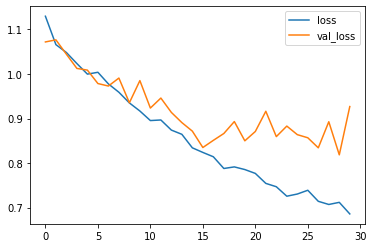

In [ ]:
import pandas as pd

metrics = pd.DataFrame(learn.history)
metrics[["loss", "val_loss"]].plot();

In [ ]:
from sklearn.metrics import classification_report

res = model.predict(valid_data)
y_test = valid_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       490
           1       0.62      0.21      0.31       100
           2       0.68      0.64      0.66       308
           3       0.75      0.19      0.30        63

    accuracy                           0.67       961
   macro avg       0.68      0.47      0.51       961
weighted avg       0.67      0.67      0.65       961



### Augmented Effect

<Figure size 432x288 with 0 Axes>

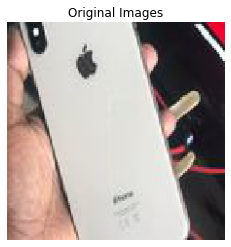

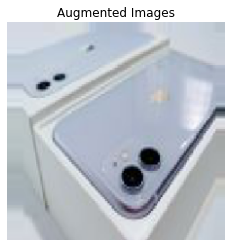

<Figure size 432x288 with 0 Axes>

In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
random_number = random.randint(0,15)
plt.imshow(images[random_number])
plt.title("Original Images")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Images")
plt.axis(False)
plt.figure()


### Transfer Learning

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

base_model = ResNet50V2(input_shape=(224,224,3),
                        include_top=False,
                        weights="imagenet")

#freeze model
base_model.trainable = False

94683136/94668760 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

model_ft = Sequential()
model_ft.add(base_model)
model_ft.add(GlobalAveragePooling2D())
model_ft.add(Dropout(0.2))
model_ft.add(Dense(15, activation='relu'))
model_ft.add(Dense(4, activation='softmax'))

# Compile
model_ft.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_ft.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 15)                30735     
                                                                 
 dense_3 (Dense)             (None, 4)                 64        
                                                                 
Total params: 23,595,599
Trainable params: 30,799
Non-trainable params: 23,564,800
_____________________________________

In [ ]:
# train model
learn = model_ft.fit(train_data_augmented,
                  epochs=100,
                  validation_data=valid_data)

Epoch 1/100
240/240 [==============================] - 51s 199ms/step - loss: 0.9146 - accuracy: 0.6252 - val_loss: 0.7349 - val_accuracy: 0.7086
Epoch 2/100
240/240 [==============================] - 46s 192ms/step - loss: 0.7308 - accuracy: 0.7110 - val_loss: 0.7112 - val_accuracy: 0.7159
Epoch 3/100
240/240 [==============================] - 46s 192ms/step - loss: 0.6471 - accuracy: 0.7433 - val_loss: 0.6359 - val_accuracy: 0.7534
Epoch 4/100
240/240 [==============================] - 46s 192ms/step - loss: 0.5798 - accuracy: 0.7660 - val_loss: 0.6065 - val_accuracy: 0.7627
Epoch 5/100
240/240 [==============================] - 46s 193ms/step - loss: 0.5508 - accuracy: 0.7838 - val_loss: 0.6127 - val_accuracy: 0.7627
Epoch 6/100
240/240 [==============================] - 46s 191ms/step - loss: 0.5371 - accuracy: 0.7864 - val_loss: 0.5671 - val_accuracy: 0.7846
Epoch 7/100
240/240 [==============================] - 46s 191ms/step - loss: 0.5097 - accuracy: 0.7937 - val_loss: 0.5726 -

In [ ]:
print("Transfer Learning dataset")
metrics = pd.DataFrame(learn.history)
metrics[["loss", "val_loss"]].plot();

In [ ]:
from sklearn.metrics import classification_report

res = model_ft.predict(valid_data)
y_test = valid_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test, res))

In [ ]:
y_test

## Save Model

In [ ]:
# Freeze Model
model_ft.trainable = False

In [ ]:
# save model
model_ft.save("model_ft")